# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # set Metric units for Temp in C 
    units = "metric"

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                         "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                         "Date": city_date})
       

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | badarpur
Processing Record 3 of Set 1 | urengoy
Processing Record 4 of Set 1 | saint-leu
Processing Record 5 of Set 1 | fuerte olimpo
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | woolgoolga
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | ashland
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | berezovyy
Processing Record 21 of Set 1 | nar'yan-mar
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-1.15,100,75,0.00,CA,1682483413
1,badarpur,24.9000,92.6000,35.58,27,16,1.85,IN,1682483643
2,urengoy,65.9667,78.3667,-3.28,80,6,3.31,RU,1682483644
3,saint-leu,-21.1500,55.2833,27.75,85,8,2.91,RE,1682483645
4,fuerte olimpo,-21.0415,-57.8738,20.90,98,47,1.36,PY,1682483645


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-1.15,100,75,0.00,CA,1682483413
1,badarpur,24.9000,92.6000,35.58,27,16,1.85,IN,1682483643
2,urengoy,65.9667,78.3667,-3.28,80,6,3.31,RU,1682483644
3,saint-leu,-21.1500,55.2833,27.75,85,8,2.91,RE,1682483645
4,fuerte olimpo,-21.0415,-57.8738,20.90,98,47,1.36,PY,1682483645


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

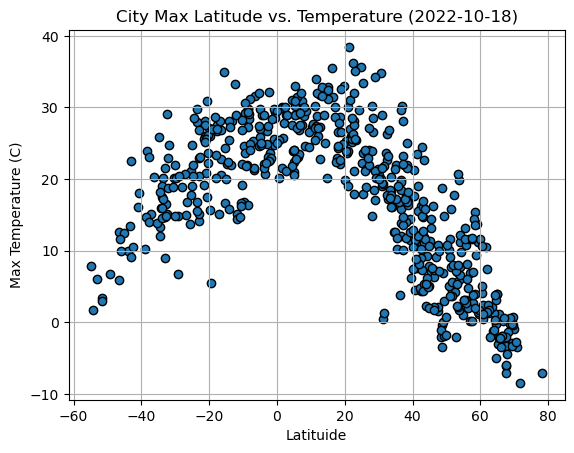

In [9]:
# Build scatter plot for latitude vs. temperature
city_latitudes = city_data_df["Lat"]
city_maxtemp = city_data_df["Max Temp"]

plt.scatter(city_latitudes,city_maxtemp,edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latituide")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

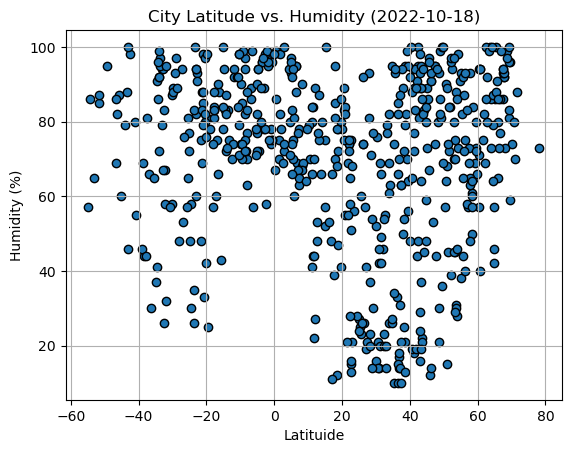

In [10]:
# Build the scatter plots for latitude vs. humidity

city_latitudes_1 = city_data_df["Lat"]
city_maxhumid = city_data_df["Humidity"]

plt.scatter(city_latitudes_1,city_maxhumid,edgecolors='black')

# Incorporate the other graph properties

plt.xlabel("Latituide")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

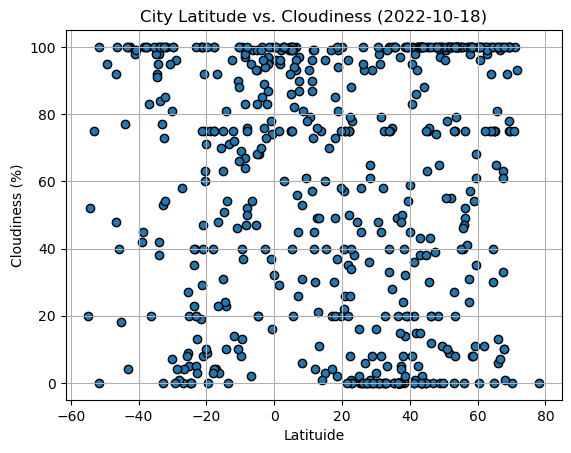

In [11]:
# Build the scatter plots for latitude vs. cloudiness

city_latitudes_2 = city_data_df["Lat"]
city_cloudiness = city_data_df["Cloudiness"]

plt.scatter(city_latitudes_2,city_cloudiness,edgecolors='black')

# Incorporate the other graph properties

plt.xlabel("Latituide")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

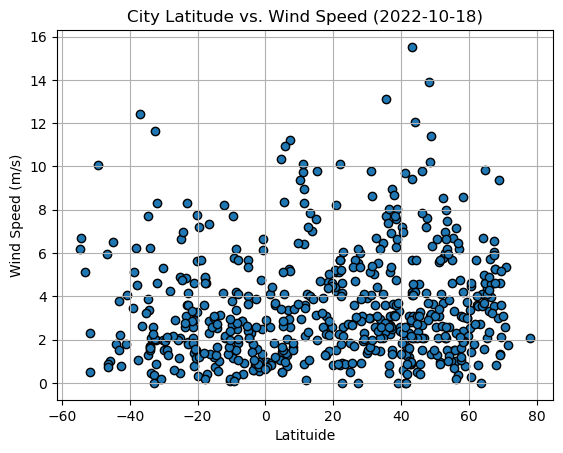

In [12]:
# Build the scatter plots for latitude vs. wind speed

city_latitudes_3 = city_data_df["Lat"]
city_wind_speed = city_data_df["Wind Speed"]

plt.scatter(city_latitudes_3,city_wind_speed,edgecolors='black')

# Incorporate the other graph properties

plt.xlabel("Latituide")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_Linear_Regression_plots(x_values, y_values):
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    return line_eq

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-1.15,100,75,0.00,CA,1682483413
1,badarpur,24.9000,92.6000,35.58,27,16,1.85,IN,1682483643
2,urengoy,65.9667,78.3667,-3.28,80,6,3.31,RU,1682483644
5,badger,64.8000,-147.5333,3.95,42,75,4.63,US,1682483647
6,aasiaat,68.7098,-52.8699,-0.28,99,100,2.98,GL,1682483537


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,saint-leu,-21.1500,55.2833,27.75,85,8,2.91,RE,1682483645
4,fuerte olimpo,-21.0415,-57.8738,20.90,98,47,1.36,PY,1682483645
8,woolgoolga,-30.1106,153.2007,21.93,58,81,5.32,AU,1682483649
9,blackmans bay,-43.0167,147.3167,22.51,46,4,2.21,AU,1682483512
10,port-aux-francais,-49.3500,70.2167,6.79,95,95,10.08,TF,1682483544


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7521870719702222


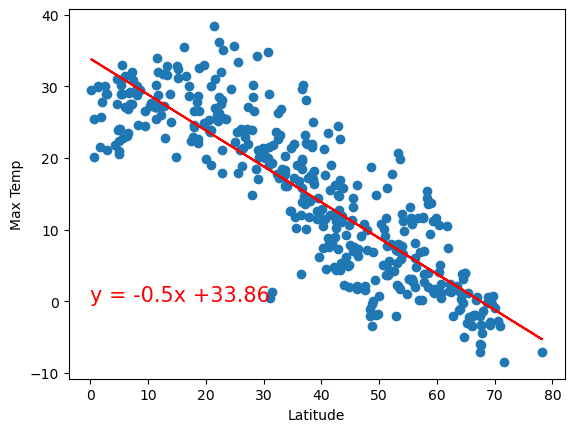

In [28]:
# Linear regression on Northern Hemisphere
north_city_latitudes = northern_hemi_df["Lat"]
north_city_maxtemp = northern_hemi_df["Max Temp"]

# Create Plot
plt.scatter(north_city_latitudes,north_city_maxtemp)

#Call func for linear regression plot
line_eq_north = create_Linear_Regression_plots(north_city_latitudes,north_city_maxtemp)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_north,(0,0),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.47188763716326765
y = 0.34x +28.32


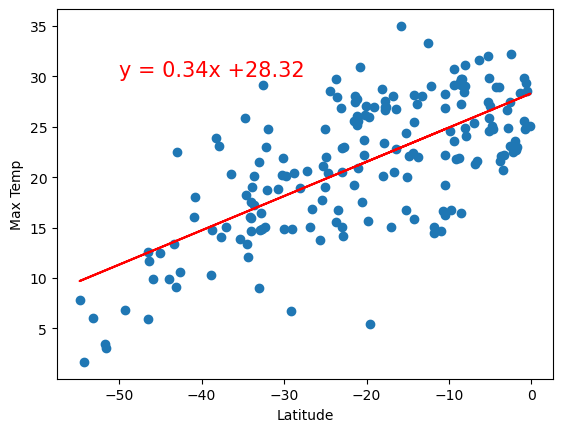

In [25]:
# Linear regression on Southern Hemisphere
south_city_latitudes = southern_hemi_df["Lat"]
south_city_maxtemp = southern_hemi_df["Max Temp"]

# Create Plot
plt.scatter(south_city_latitudes,south_city_maxtemp)

#Call func for linear regression plot
line_eq_south = create_Linear_Regression_plots(south_city_latitudes,south_city_maxtemp)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_south,(-50,30),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The r-value 0.75 defines a "strong positive" linear relationship between Latitude and Max Temperature for Northern Hemisphere.
The r-value 0.47 defines a "moderate positive" linear relationship between Latitude and Max Temperature for Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015791955648675478
y = 0.17x +59.84


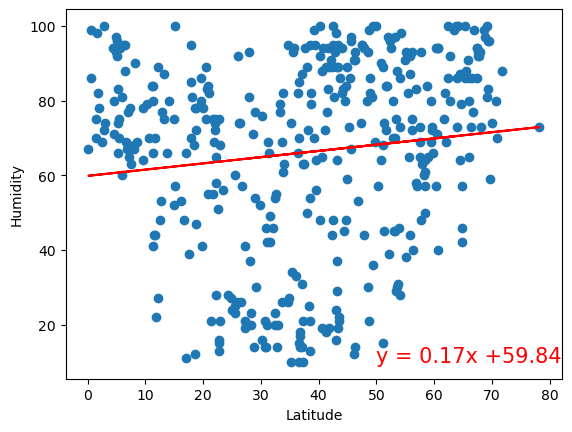

In [18]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_city_latitudes_1 = northern_hemi_df["Lat"]
north_city_humid_1 = northern_hemi_df["Humidity"]

# Create Plot
plt.scatter(north_city_latitudes_1,north_city_humid_1)

#Call func for linear regression plot
line_eq_north_1 = create_Linear_Regression_plots(north_city_latitudes_1,north_city_humid_1)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_north_1,(50,10),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.04582989012636202
y = 0.28x +83.21


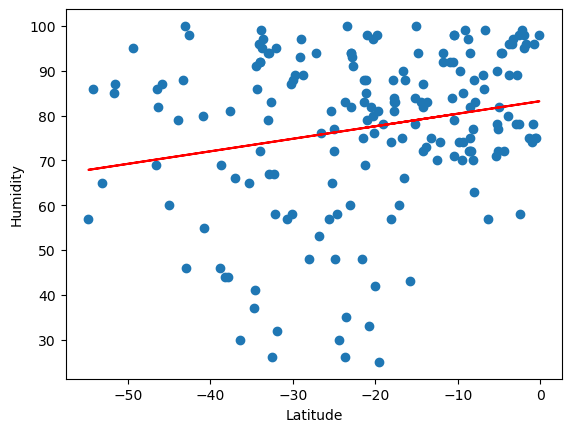

In [19]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_city_latitudes_1 = southern_hemi_df["Lat"]
south_city_humid_1 = southern_hemi_df["Humidity"]

# Create Plot
plt.scatter(south_city_latitudes_1,south_city_humid_1)

#Call func for linear regression plot
line_eq_south_1 = create_Linear_Regression_plots(south_city_latitudes_1,south_city_humid_1)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_south_1,(50,10),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The r-value 0.01 defines a "weak positive" linear relationship between Latitude and Humidity for Northern Hemisphere.
The r-value 0.04 defines a "weak positive" linear relationship between Latitude and Humidity for Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003154444415169318
y = 0.11x +53.43


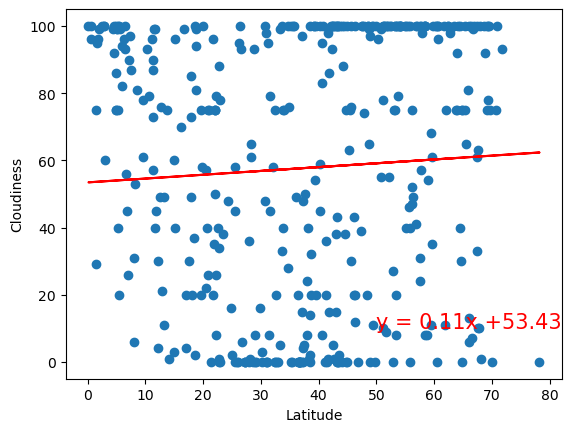

In [20]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_city_latitudes_2 = northern_hemi_df["Lat"]
north_city_cloud_2 = northern_hemi_df["Cloudiness"]

# Create Plot
plt.scatter(north_city_latitudes_2,north_city_cloud_2)

#Call func for linear regression plot
line_eq_north_2 = create_Linear_Regression_plots(north_city_latitudes_2,north_city_cloud_2)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_north_2,(50,10),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.00031365467241787503
y = 0.05x +61.01


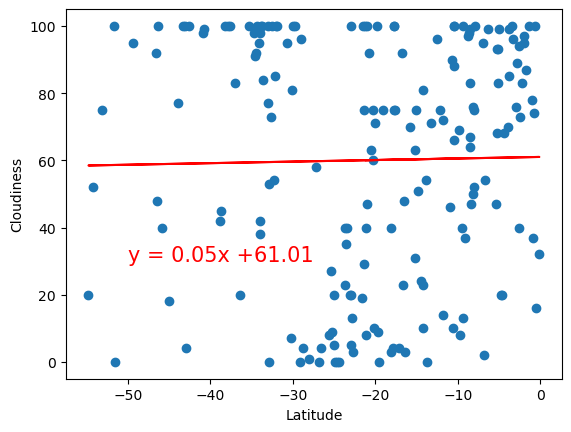

In [26]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_city_latitudes_2 = southern_hemi_df["Lat"]
south_city_cloud_2 = southern_hemi_df["Cloudiness"]

# Create Plot
plt.scatter(south_city_latitudes_2,south_city_cloud_2)

#Call func for linear regression plot
line_eq_south_2 = create_Linear_Regression_plots(south_city_latitudes_2,south_city_cloud_2)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_south_2,(-50,30),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The r-value 0.003 defines a "very weak positive" linear relationship between Latitude and Cloudiness for Northern Hemisphere.
The r-value 0.00 defines a "no" linear relationship between Latitude and Cloudiness for Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00011024617036750045
y = 0.0x +3.69


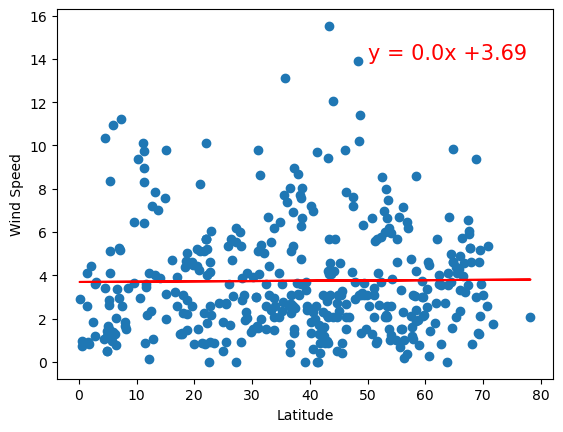

In [27]:
# Northern Hemisphere
north_city_latitudes_3 = northern_hemi_df["Lat"]
north_city_wind_speed_3 = northern_hemi_df["Wind Speed"]

# Create Plot
plt.scatter(north_city_latitudes_3,north_city_wind_speed_3)

#Call func for linear regression plot
line_eq_north_3 = create_Linear_Regression_plots(north_city_latitudes_3,north_city_wind_speed_3)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_north_3,(50,14),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.03314126942892532
y = -0.03x +2.32


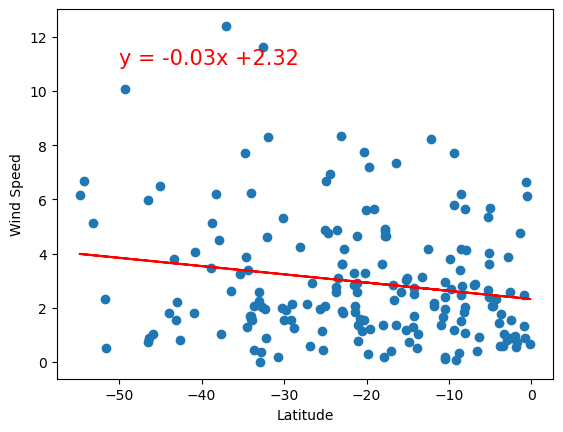

In [23]:
# Southern Hemisphere
south_city_latitudes_3 = southern_hemi_df["Lat"]
south_city_wind_speed_3 = southern_hemi_df["Wind Speed"]

# Create Plot
plt.scatter(south_city_latitudes_3,south_city_wind_speed_3)

#Call func for linear regression plot
line_eq_south_3 = create_Linear_Regression_plots(south_city_latitudes_3,south_city_wind_speed_3)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_south_3,(-50,11),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The r-value 0.00 defines a "no" linear relationship between Latitude and Wind Speed for Northern Hemisphere.
The r-value 0.03 defines a "weak positive" linear relationship between Latitude and Wind Speed for Southern Hemisphere.